### LOADING THE DATASET

In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("C:/Users/HP/Downloads/epl_player_stats_24_25.csv")

In [4]:
df.head(5) #Display the first 5 Rows

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,12,...,10,2,0,0,0%,0,0,0,0,0.0
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,...,15,3,0,0,0%,0,0,0,0,0.0
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,...,1,3,0,86,72%,0,0,8,53,2.1
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,...,21,5,1,0,0%,0,0,0,0,0.0
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,...,9,1,0,0,0%,0,0,0,0,0.0


In [6]:
df.columns # Show the columns

Index(['Player Name', 'Club', 'Nationality', 'Position', 'Appearances',
       'Minutes', 'Goals', 'Assists', 'Shots', 'Shots On Target',
       'Conversion %', 'Big Chances Missed', 'Hit Woodwork', 'Offsides',
       'Touches', 'Passes', 'Successful Passes', 'Passes%', 'Crosses',
       'Successful Crosses', 'Crosses %', 'fThird Passes',
       'Successful fThird Passes', 'fThird Passes %', 'Through Balls',
       'Carries', 'Progressive Carries', 'Carries Ended with Goal',
       'Carries Ended with Assist', 'Carries Ended with Shot',
       'Carries Ended with Chance', 'Possession Won', 'Dispossessed',
       'Clean Sheets', 'Clearances', 'Interceptions', 'Blocks', 'Tackles',
       'Ground Duels', 'gDuels Won', 'gDuels %', 'Aerial Duels', 'aDuels Won',
       'aDuels %', 'Goals Conceded', 'xGoT Conceded', 'Own Goals', 'Fouls',
       'Yellow Cards', 'Red Cards', 'Saves', 'Saves %', 'Penalties Saved',
       'Clearances Off Line', 'Punches', 'High Claims', 'Goals Prevented'],
      

### DATA CLEANING

In [10]:
df.isna().sum()

Player Name                  0
Club                         0
Nationality                  0
Position                     0
Appearances                  0
Minutes                      0
Goals                        0
Assists                      0
Shots                        0
Shots On Target              0
Conversion %                 0
Big Chances Missed           0
Hit Woodwork                 0
Offsides                     0
Touches                      0
Passes                       0
Successful Passes            0
Passes%                      0
Crosses                      0
Successful Crosses           0
Crosses %                    0
fThird Passes                0
Successful fThird Passes     0
fThird Passes %              0
Through Balls                0
Carries                      0
Progressive Carries          0
Carries Ended with Goal      0
Carries Ended with Assist    0
Carries Ended with Shot      0
Carries Ended with Chance    0
Possession Won               0
Disposse

In [14]:
df.isnull().sum()

Player Name                  0
Club                         0
Nationality                  0
Position                     0
Appearances                  0
Minutes                      0
Goals                        0
Assists                      0
Shots                        0
Shots On Target              0
Conversion %                 0
Big Chances Missed           0
Hit Woodwork                 0
Offsides                     0
Touches                      0
Passes                       0
Successful Passes            0
Passes%                      0
Crosses                      0
Successful Crosses           0
Crosses %                    0
fThird Passes                0
Successful fThird Passes     0
fThird Passes %              0
Through Balls                0
Carries                      0
Progressive Carries          0
Carries Ended with Goal      0
Carries Ended with Assist    0
Carries Ended with Shot      0
Carries Ended with Chance    0
Possession Won               0
Disposse

In [16]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
557    False
558    False
559    False
560    False
561    False
Length: 562, dtype: bool

In [19]:
df.duplicated().sum()

0

In [21]:
for col in df.columns:
    if df[col].dtype == 'object' and df[col].astype(str).str.contains('%').any():
        df[col] = df[col].str.replace('%', '').astype(float)# Automatically find and clean percentage columns

In [23]:
df.columns

Index(['Player Name', 'Club', 'Nationality', 'Position', 'Appearances',
       'Minutes', 'Goals', 'Assists', 'Shots', 'Shots On Target',
       'Conversion %', 'Big Chances Missed', 'Hit Woodwork', 'Offsides',
       'Touches', 'Passes', 'Successful Passes', 'Passes%', 'Crosses',
       'Successful Crosses', 'Crosses %', 'fThird Passes',
       'Successful fThird Passes', 'fThird Passes %', 'Through Balls',
       'Carries', 'Progressive Carries', 'Carries Ended with Goal',
       'Carries Ended with Assist', 'Carries Ended with Shot',
       'Carries Ended with Chance', 'Possession Won', 'Dispossessed',
       'Clean Sheets', 'Clearances', 'Interceptions', 'Blocks', 'Tackles',
       'Ground Duels', 'gDuels Won', 'gDuels %', 'Aerial Duels', 'aDuels Won',
       'aDuels %', 'Goals Conceded', 'xGoT Conceded', 'Own Goals', 'Fouls',
       'Yellow Cards', 'Red Cards', 'Saves', 'Saves %', 'Penalties Saved',
       'Clearances Off Line', 'Punches', 'High Claims', 'Goals Prevented'],
      

In [25]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [27]:
df.columns

Index(['player_name', 'club', 'nationality', 'position', 'appearances',
       'minutes', 'goals', 'assists', 'shots', 'shots_on_target',
       'conversion_%', 'big_chances_missed', 'hit_woodwork', 'offsides',
       'touches', 'passes', 'successful_passes', 'passes%', 'crosses',
       'successful_crosses', 'crosses_%', 'fthird_passes',
       'successful_fthird_passes', 'fthird_passes_%', 'through_balls',
       'carries', 'progressive_carries', 'carries_ended_with_goal',
       'carries_ended_with_assist', 'carries_ended_with_shot',
       'carries_ended_with_chance', 'possession_won', 'dispossessed',
       'clean_sheets', 'clearances', 'interceptions', 'blocks', 'tackles',
       'ground_duels', 'gduels_won', 'gduels_%', 'aerial_duels', 'aduels_won',
       'aduels_%', 'goals_conceded', 'xgot_conceded', 'own_goals', 'fouls',
       'yellow_cards', 'red_cards', 'saves', 'saves_%', 'penalties_saved',
       'clearances_off_line', 'punches', 'high_claims', 'goals_prevented'],
      

### EXPLORATORY DATA ANALYSIS

In [30]:
df.shape #number of rows and columns

(562, 57)

In [32]:
df.columns

Index(['player_name', 'club', 'nationality', 'position', 'appearances',
       'minutes', 'goals', 'assists', 'shots', 'shots_on_target',
       'conversion_%', 'big_chances_missed', 'hit_woodwork', 'offsides',
       'touches', 'passes', 'successful_passes', 'passes%', 'crosses',
       'successful_crosses', 'crosses_%', 'fthird_passes',
       'successful_fthird_passes', 'fthird_passes_%', 'through_balls',
       'carries', 'progressive_carries', 'carries_ended_with_goal',
       'carries_ended_with_assist', 'carries_ended_with_shot',
       'carries_ended_with_chance', 'possession_won', 'dispossessed',
       'clean_sheets', 'clearances', 'interceptions', 'blocks', 'tackles',
       'ground_duels', 'gduels_won', 'gduels_%', 'aerial_duels', 'aduels_won',
       'aduels_%', 'goals_conceded', 'xgot_conceded', 'own_goals', 'fouls',
       'yellow_cards', 'red_cards', 'saves', 'saves_%', 'penalties_saved',
       'clearances_off_line', 'punches', 'high_claims', 'goals_prevented'],
      

In [34]:
df.info

<bound method DataFrame.info of          player_name                     club nationality position  \
0          Ben White                  Arsenal     England      DEF   
1        Bukayo Saka                  Arsenal     England      MID   
2         David Raya                  Arsenal       Spain      GKP   
3        Declan Rice                  Arsenal     England      MID   
4      Ethan Nwaneri                  Arsenal     England      MID   
..               ...                      ...         ...      ...   
557   Santiago Bueno  Wolverhampton Wanderers     Uruguay      DEF   
558         Tom King  Wolverhampton Wanderers       Wales      GKP   
559      Tommy Doyle  Wolverhampton Wanderers     England      MID   
560       Toti Gomes  Wolverhampton Wanderers    Portugal      DEF   
561  Yerson Mosquera  Wolverhampton Wanderers    Colombia      DEF   

     appearances  minutes  goals  assists  shots  shots_on_target  ...  fouls  \
0             17     1198      0        2     

In [38]:
df.describe() #Basic Stats for Numeric columns

,appearances,minutes,goals,assists,shots,shots_on_target,conversion_%,big_chances_missed,hit_woodwork,offsides,...,fouls,yellow_cards,red_cards,saves,saves_%,penalties_saved,clearances_off_line,punches,high_claims,goals_prevented
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,...,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,20.581851,1336.208185,1.713523,1.145907,17.526690,5.514235,4.713523,2.135231,0.496441,2.250890,...,14.295374,2.756228,0.092527,4.161922,3.149466,0.024911,0.145907,0.467972,1.304270,0.068505
std,12.136239,1055.099340,3.310674,2.197891,22.342341,9.407054,7.470307,3.732051,0.986986,4.085456,...,15.040111,2.750985,0.307913,18.616319,14.339992,0.187160,0.473986,2.832182,6.230133,0.635313
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.200000
25%,10.000000,336.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,1156.000000,0.000000,0.000000,10.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,2229.250000,2.000000,2.000000,25.000000,7.000000,8.000000,3.000000,1.000000,3.000000,...,22.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.000000,3420.000000,29.000000,18.000000,130.000000,61.000000,50.000000,27.000000,6.000000,28.000000,...,73.000000,12.000000,2.000000,153.000000,74.000000,2.000000,3.000000,28.000000,56.000000,6.000000


### DISTRIBUTION PLOTS

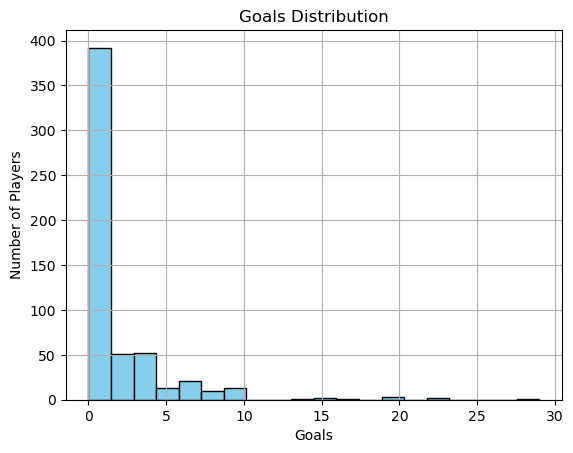

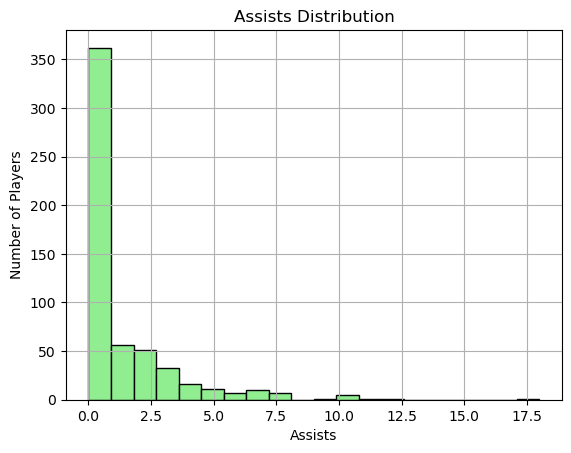

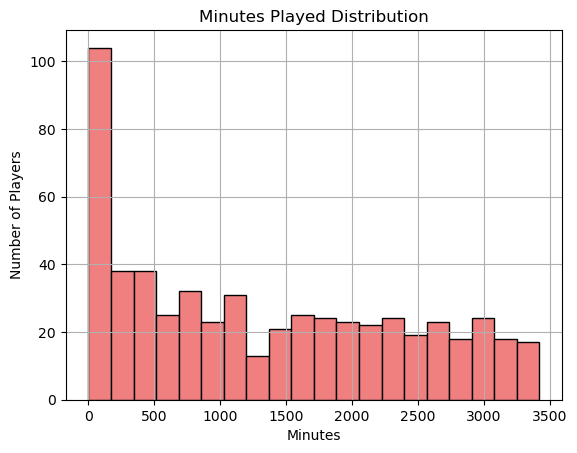

In [40]:
import matplotlib.pyplot as plt

# Histogram for Goals
plt.hist(df["goals"], bins=20, color='skyblue', edgecolor='black')
plt.title("Goals Distribution")
plt.xlabel("Goals")
plt.ylabel("Number of Players")
plt.grid(True)
plt.show()

# Histogram for Assists
plt.hist(df["assists"], bins=20, color='lightgreen', edgecolor='black')
plt.title("Assists Distribution")
plt.xlabel("Assists")
plt.ylabel("Number of Players")
plt.grid(True)
plt.show()

# Histogram for Minutes Played
plt.hist(df["minutes"], bins=20, color='lightcoral', edgecolor='black')
plt.title("Minutes Played Distribution")
plt.xlabel("Minutes")
plt.ylabel("Number of Players")
plt.grid(True)
plt.show()


**histograms are to understand how values like goals, assists, and minutes are distributed.**

### PLAYER LEVEL ANALYSIS

In [45]:
# 1. Top 10 goal scorers
print(df.sort_values(by="goals", ascending=False)[["player_name", "goals"]].head(10))

              player_name  goals
324         Mohamed Salah     29
391        Alexander Isak     23
335        Erling Haaland     22
82           Bryan Mbeumo     20
417            Chris Wood     20
107           Yoane Wissa     19
46          Ollie Watkins     16
548         Matheus Cunha     15
141           Cole Palmer     15
180  Jean-Philippe Mateta     14


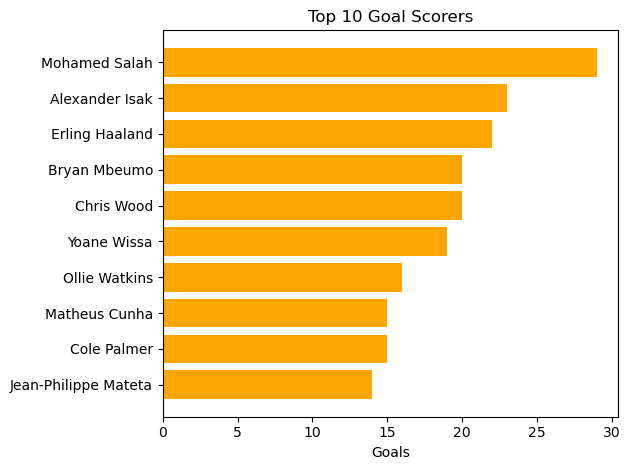

In [47]:
top_goals = df.sort_values(by="goals", ascending=False).head(10)
plt.barh(top_goals["player_name"], top_goals["goals"], color='orange')
plt.xlabel("Goals")
plt.title("Top 10 Goal Scorers")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

          player_name  assists
324     Mohamed Salah       18
399      Jacob Murphy       12
415    Anthony Elanga       11
99   Mikkel Damsgaard       10
45      Morgan Rogers       10
367   Bruno Fernandes       10
1         Bukayo Saka       10
222  Antonee Robinson       10
497     Son Heung-Min        9
514      Jarrod Bowen        8


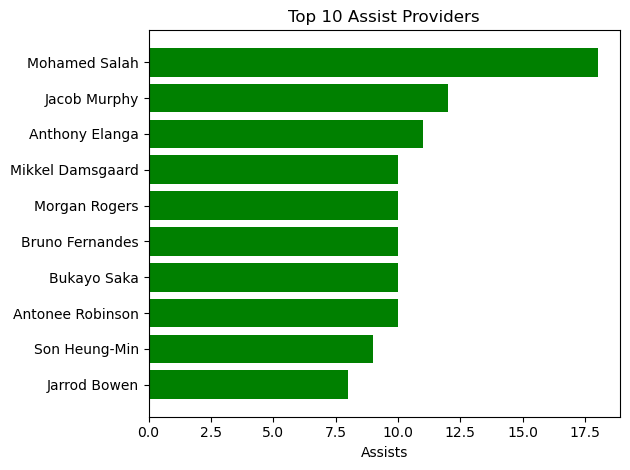

In [55]:
top_assists = df.sort_values(by="assists", ascending=False)[['player_name', 'assists']].head(10)
print(top_assists)

plt.barh(top_assists["player_name"], top_assists["assists"], color='green')
plt.xlabel("Assists")
plt.title("Top 10 Assist Providers")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

           player_name  minutes
223         Bernd Leno     3420
2           David Raya     3420
100     Nathan Collins     3420
210    Jordan Pickford     3420
176     Dean Henderson     3420
424          Matz Sels     3420
82        Bryan Mbeumo     3415
324      Mohamed Salah     3377
153     Moisés Caicedo     3356
522  Maximilian Kilman     3349


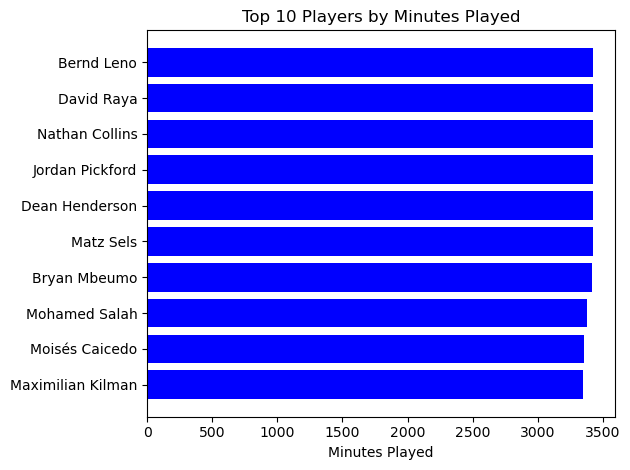

In [57]:
top_minutes = df.sort_values(by="minutes", ascending=False)[['player_name', 'minutes']].head(10)
print(top_minutes)

plt.barh(top_minutes["player_name"], top_minutes["minutes"], color='blue')
plt.xlabel("Minutes Played")
plt.title("Top 10 Players by Minutes Played")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

        player_name  goal_contribution
324   Mohamed Salah                 47
82     Bryan Mbeumo                 27
335  Erling Haaland                 25
46    Ollie Watkins                 24
417      Chris Wood                 23
391  Alexander Isak                 23
141     Cole Palmer                 23
548   Matheus Cunha                 21
399    Jacob Murphy                 20
107     Yoane Wissa                 19


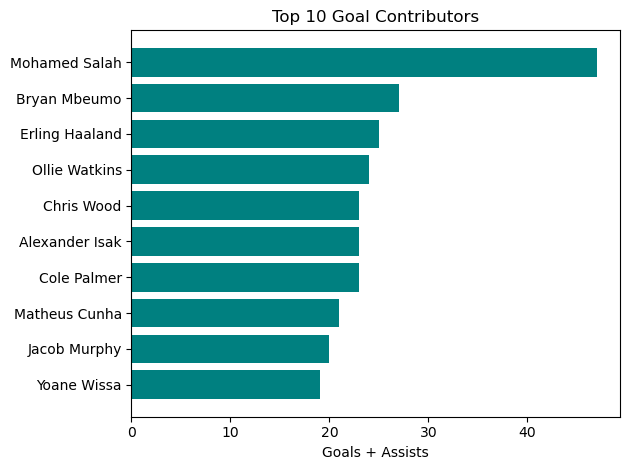

In [59]:
df["goal_contribution"] = df["goals"] + df["assists"]
top_contrib = df.sort_values(by="goal_contribution", ascending=False)[['player_name', 'goal_contribution']].head(10)
print(top_contrib)

plt.barh(top_contrib["player_name"], top_contrib["goal_contribution"], color='teal')
plt.xlabel("Goals + Assists")
plt.title("Top 10 Goal Contributors")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


            player_name  shot_accuracy
122          Igor Julio      18.000000
297        Oliver Skipp       8.000000
414         Álex Moreno       7.666667
515   Jean-Clair Todibo       6.600000
71        Marcos Senesi       5.333333
106     Yehor Yarmoliuk       4.777778
279         Caleb Okoli       4.250000
240        Sander Berge       4.000000
208  Jarrad Branthwaite       3.700000
75         Milos Kerkez       3.210526


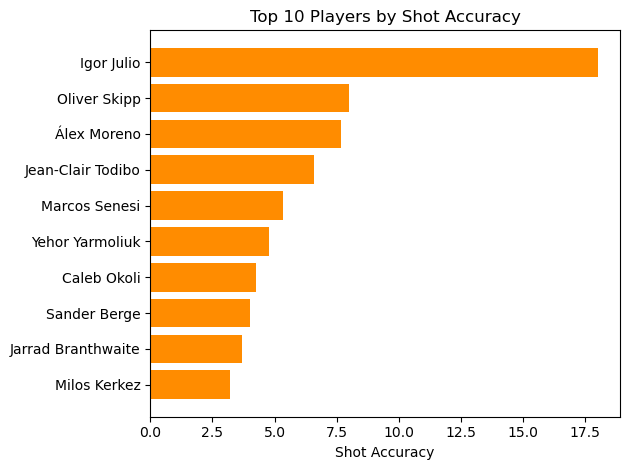

In [61]:
df["shot_accuracy"] = (df["shots_on_target"] / df["shots"]).replace([float("inf"), None], 0)
top_shooters = df.sort_values(by="shot_accuracy", ascending=False)[['player_name', 'shot_accuracy']].head(10)
print(top_shooters)

plt.barh(top_shooters["player_name"], top_shooters["shot_accuracy"], color='darkorange')
plt.xlabel("Shot Accuracy")
plt.title("Top 10 Players by Shot Accuracy")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


         player_name  pass_accuracy
192      Will Hughes       0.945819
149       Malo Gusto       0.940767
463     Ryan Manning       0.937635
477  Cristian Romero       0.936733
427          Murillo       0.935532
61         Evanilson       0.932639
531            André       0.930493
288      Jamie Vardy       0.928699
14   Martin Ødegaard       0.927583
202    Idrissa Gueye       0.927069


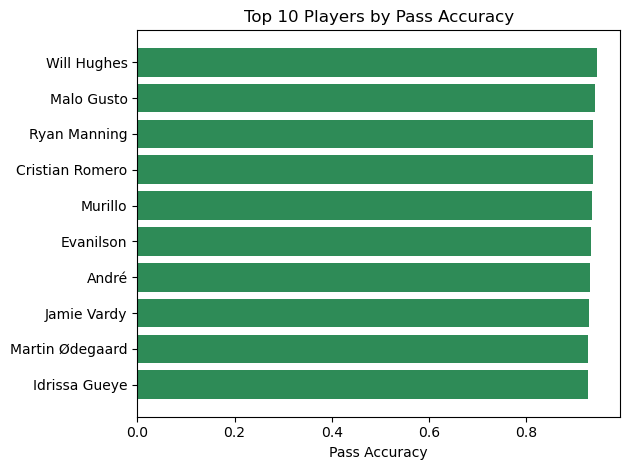

In [63]:
df["pass_accuracy"] = (df["successful_passes"] / df["passes"]).replace([float("inf"), None], 0)
top_passers = df.sort_values(by="pass_accuracy", ascending=False)[['player_name', 'pass_accuracy']].head(10)
print(top_passers)

plt.barh(top_passers["player_name"], top_passers["pass_accuracy"], color='seagreen')
plt.xlabel("Pass Accuracy")
plt.title("Top 10 Players by Pass Accuracy")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


            player_name  passes
301  Victor Kristiansen    2923
456    Lesley Ugochukwu    2595
192         Will Hughes    2547
128        Joël Veltman    2528
463        Ryan Manning    2309
449        Jan Bednarek    2265
525      Mohammed Kudus    2153
416  Callum Hudson-Odoi    2137
300     Stephy Mavididi    2124
340         Jérémy Doku    2054


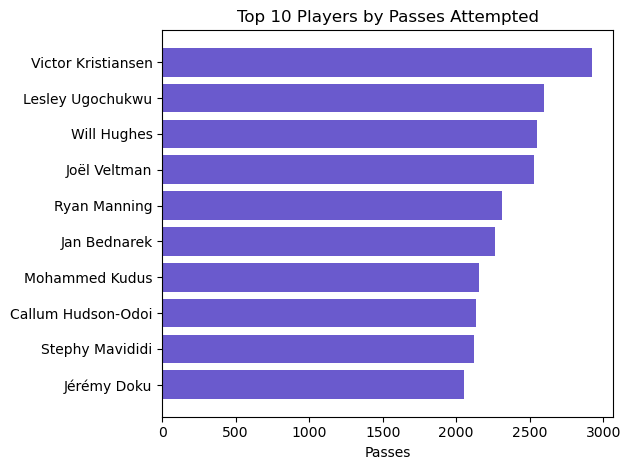

In [65]:
top_passes = df.sort_values(by="passes", ascending=False)[['player_name', 'passes']].head(10)
print(top_passes)

plt.barh(top_passes["player_name"], top_passes["passes"], color='slateblue')
plt.xlabel("Passes")
plt.title("Top 10 Players by Passes Attempted")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


             player_name  fouls
54       Antoine Semenyo     73
267           Liam Delap     72
153       Moisés Caicedo     70
542           João Gomes     70
241           Sasa Lukic     66
393      Bruno Guimarães     65
192          Will Hughes     65
306  Alexis Mac Allister     62
401            Joelinton     58
175         Daniel Muñoz     56


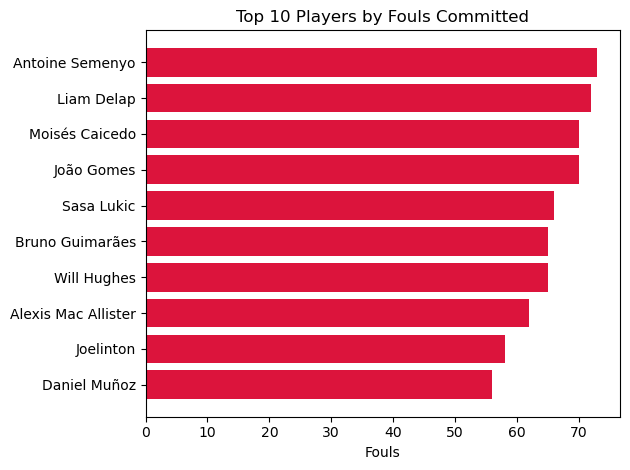

In [67]:
top_fouls = df.sort_values(by="fouls", ascending=False)[['player_name', 'fouls']].head(10)
print(top_fouls)

plt.barh(top_fouls["player_name"], top_fouls["fouls"], color='crimson')
plt.xlabel("Fouls")
plt.title("Top 10 Players by Fouls Committed")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Goals vs Assists**

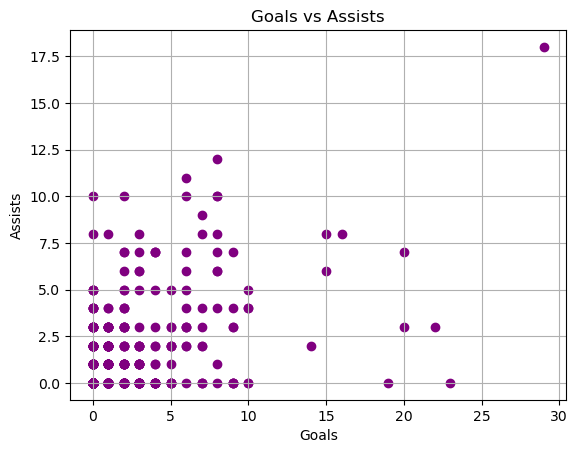

In [70]:
plt.scatter(df["goals"], df["assists"], color='purple')
plt.title("Goals vs Assists")
plt.xlabel("Goals")
plt.ylabel("Assists")
plt.grid(True)
plt.show()

**Good for spotting dual-threat attackers**

**Minutes Played vs Goals**

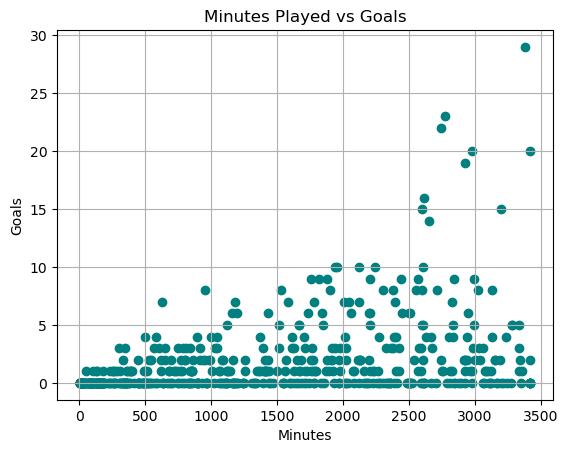

In [74]:


plt.scatter(df["minutes"], df["goals"], color='teal')
plt.title("Minutes Played vs Goals")
plt.xlabel("Minutes")
plt.ylabel("Goals")
plt.grid(True)
plt.show()

**See if players who play more score more**

### TEAM LEVEL ANLAYSIS

club
Liverpool                  72
Manchester City            71
Arsenal                    67
Newcastle United           66
Brighton & Hove Albion     63
Chelsea                    63
Aston Villa                61
Nottingham Forest          57
Brentford                  54
Crystal Palace             51
Tottenham Hotspur          50
Everton                    41
Fulham                     41
Wolverhampton Wanderers    39
Manchester United          38
West Ham United            31
Leicester City             28
Bournemouth                24
Southampton                23
Ipswich Town               23
Brighton                    0
Name: goals, dtype: int64


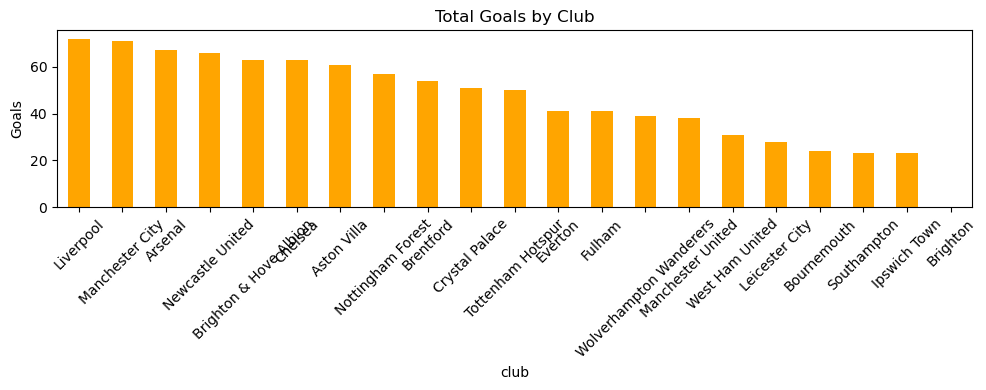

In [78]:
#Total Goals Per Club

goals_by_club = df.groupby("club")["goals"].sum().sort_values(ascending=False)
print(goals_by_club)

goals_by_club.plot(kind="bar", color="orange", figsize=(10, 4))
plt.title("Total Goals by Club")
plt.ylabel("Goals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

club
Liverpool                  60
Arsenal                    50
Aston Villa                46
Nottingham Forest          39
Fulham                     37
Newcastle United           37
Crystal Palace             37
Tottenham Hotspur          36
Wolverhampton Wanderers    34
Brentford                  33
Chelsea                    32
Manchester City            31
Bournemouth                28
Manchester United          27
West Ham United            25
Brighton & Hove Albion     24
Leicester City             21
Ipswich Town               20
Everton                    17
Southampton                10
Brighton                    0
Name: assists, dtype: int64


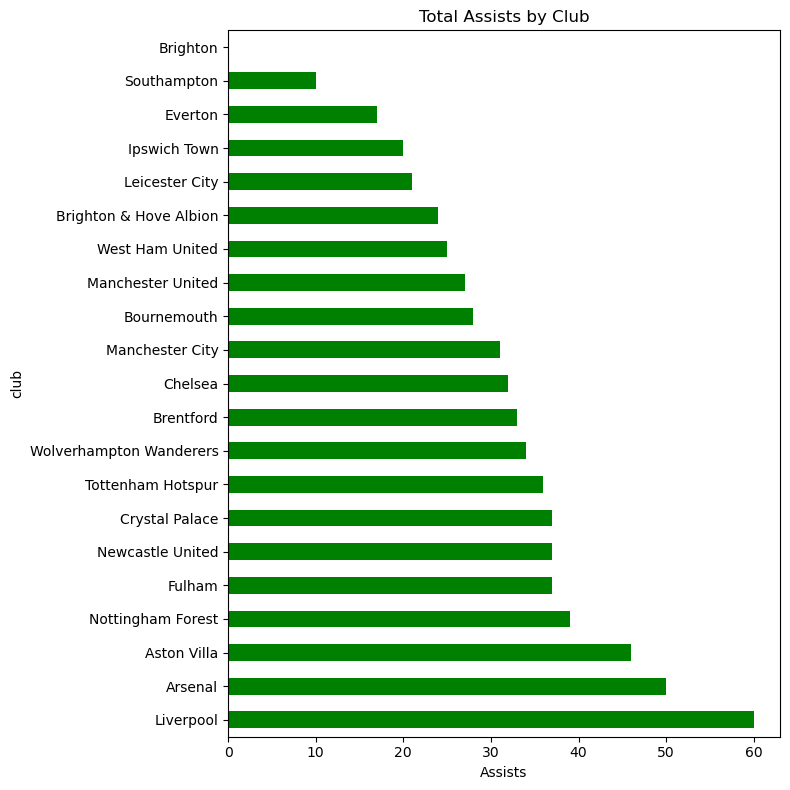

In [80]:
#Total Assists Per Club

assists_by_club = df.groupby("club")["assists"].sum().sort_values(ascending=False)
print(assists_by_club)

assists_by_club.plot(kind="barh", color="green", figsize=(8, 8))
plt.title("Total Assists by Club")
plt.xlabel("Assists")
plt.tight_layout()
plt.show()

club
Liverpool                  5.500000
Arsenal                    4.680000
Newcastle United           4.478261
Nottingham Forest          4.173913
Aston Villa                3.962963
Chelsea                    3.392857
Crystal Palace             3.384615
Manchester City            3.290323
Brentford                  3.107143
Brighton & Hove Albion     3.107143
Fulham                     3.000000
Tottenham Hotspur          2.774194
Wolverhampton Wanderers    2.281250
Everton                    2.230769
Manchester United          2.166667
West Ham United            2.000000
Bournemouth                1.793103
Leicester City             1.580645
Ipswich Town               1.433333
Southampton                0.970588
Brighton                   0.000000
Name: goal_contribution, dtype: float64


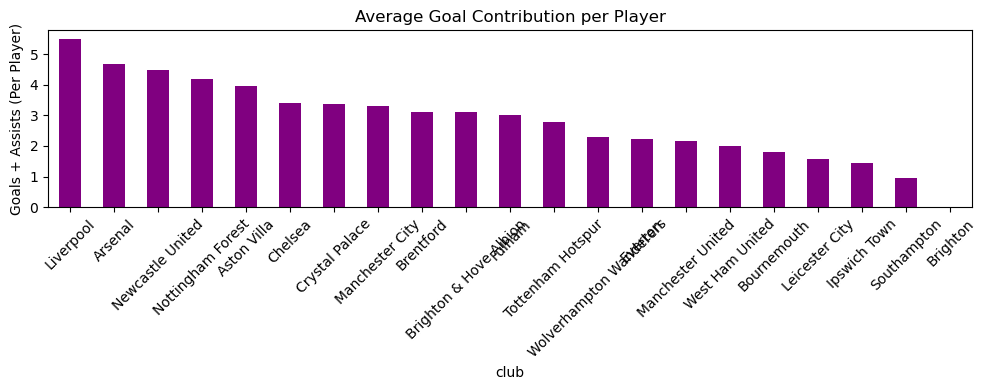

In [82]:
#Avg Goal Contribution Per Player Per Club

avg_gc = df.groupby("club")["goal_contribution"].mean().sort_values(ascending=False)
print(avg_gc)

avg_gc.plot(kind="bar", color="purple", figsize=(10, 4))
plt.title("Average Goal Contribution per Player")
plt.ylabel("Goals + Assists (Per Player)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

club
Bournemouth                500
West Ham United            447
Tottenham Hotspur          440
Wolverhampton Wanderers    438
Everton                    437
Chelsea                    432
Liverpool                  430
Brighton & Hove Albion     429
Fulham                     404
Nottingham Forest          403
Ipswich Town               403
Crystal Palace             400
Manchester United          395
Newcastle United           389
Southampton                378
Aston Villa                374
Arsenal                    369
Leicester City             352
Brentford                  320
Manchester City            291
Brighton                     3
Name: fouls, dtype: int64


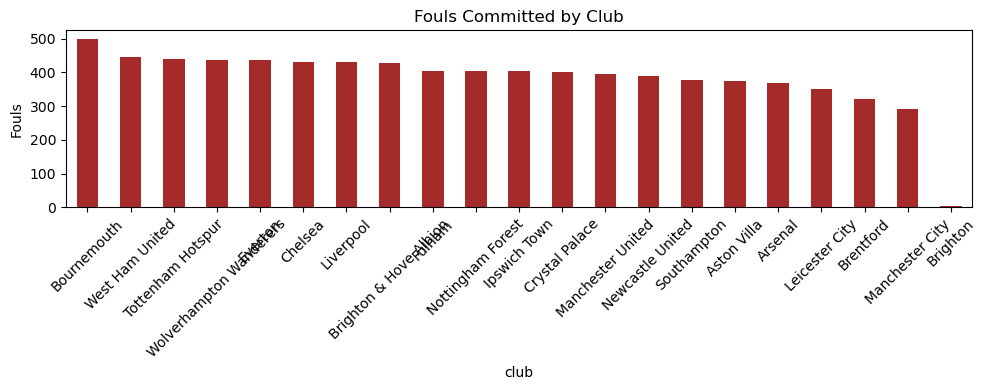

In [84]:
#Most Fouls By Club

fouls = df.groupby("club")["fouls"].sum().sort_values(ascending=False)
print(fouls)

fouls.plot(kind="bar", color="brown", figsize=(10, 4))
plt.title("Fouls Committed by Club")
plt.ylabel("Fouls")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

club
Nottingham Forest          1651.086957
Newcastle United           1619.869565
Liverpool                  1563.541667
Arsenal                    1502.920000
Everton                    1494.076923
Crystal Palace             1458.576923
Fulham                     1448.500000
Aston Villa                1427.000000
West Ham United            1366.642857
Chelsea                    1366.535714
Brentford                  1341.821429
Brighton & Hove Albion     1316.178571
Bournemouth                1298.103448
Manchester City            1242.709677
Ipswich Town               1228.833333
Manchester United          1216.633333
Tottenham Hotspur          1213.516129
Wolverhampton Wanderers    1174.968750
Leicester City             1164.258065
Southampton                1049.470588
Brighton                     91.000000
Name: minutes, dtype: float64


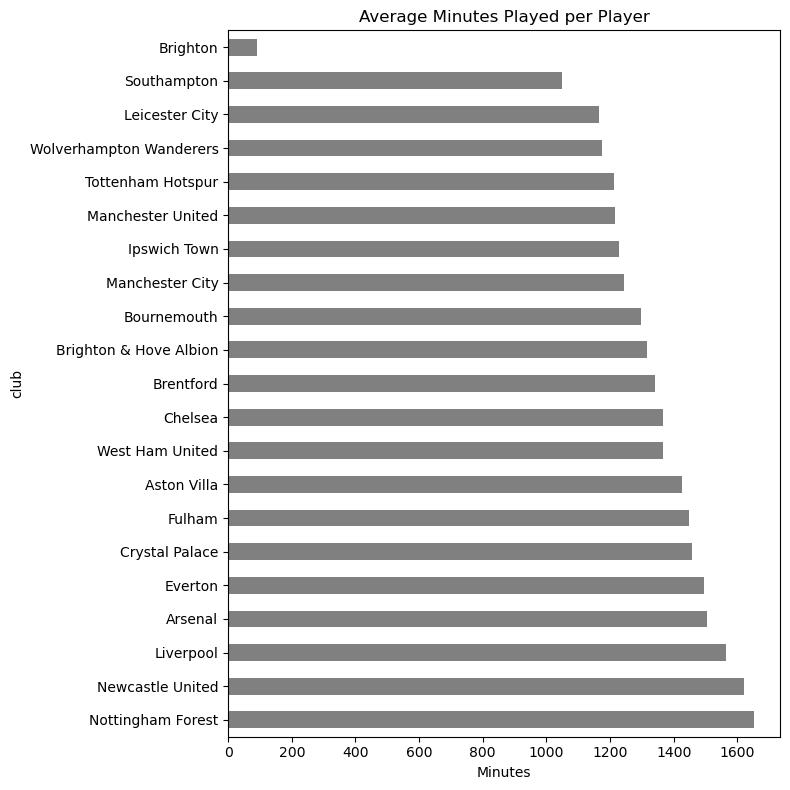

In [86]:
##Avg Minutes per Player per Club

avg_minutes = df.groupby("club")["minutes"].mean().sort_values(ascending=False)
print(avg_minutes)

avg_minutes.plot(kind="barh", color="gray", figsize=(8, 8))
plt.title("Average Minutes Played per Player")
plt.xlabel("Minutes")
plt.tight_layout()
plt.show()

position                 DEF  FWD  GKP  MID
club                                       
Arsenal                   11   12    0   44
Aston Villa                8   26    0   27
Bournemouth                5    3    0   16
Brentford                  4   21    0   29
Brighton                   0    0    0    0
Brighton & Hove Albion     5   30    0   28
Chelsea                   12   12    0   39
Crystal Palace            10   17    0   24
Everton                    6   22    0   13
Fulham                     5    8    0   28
Ipswich Town               3    7    0   13
Leicester City             5   10    0   13
Liverpool                  7   21    0   44
Manchester City           10   30    0   31
Manchester United          5    7    0   26
Newcastle United           5   24    0   37
Nottingham Forest         10   25    0   22
Southampton                5    9    0    9
Tottenham Hotspur          4   16    0   30
West Ham United            2    7    2   20
Wolverhampton Wanderers   10    

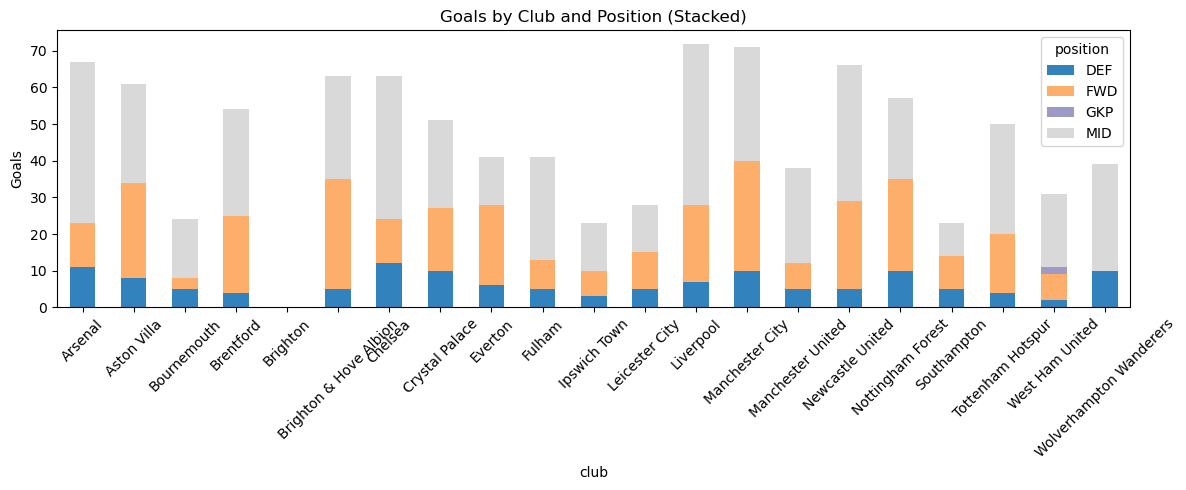

In [90]:
#Goals by Club and Position 
pivot = df.pivot_table(values="goals", index="club", columns="position", aggfunc="sum", fill_value=0)
print(pivot)

# Heatmap-style stacked bar plot
pivot.plot(kind="bar", stacked=True, figsize=(12, 5), colormap="tab20c")
plt.title("Goals by Club and Position (Stacked)")
plt.ylabel("Goals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

club
Brighton & Hove Albion     0.862062
Everton                    0.852512
Southampton                0.849000
Wolverhampton Wanderers    0.846889
Leicester City             0.845042
Fulham                     0.840572
Liverpool                  0.838076
Ipswich Town               0.835449
Nottingham Forest          0.835297
Brentford                  0.833700
Crystal Palace             0.833247
Chelsea                    0.832324
Manchester City            0.830015
Arsenal                    0.824699
Manchester United          0.823194
West Ham United            0.819637
Bournemouth                0.817853
Aston Villa                0.811967
Tottenham Hotspur          0.810438
Newcastle United           0.791521
Brighton                        NaN
Name: pass_accuracy, dtype: float64


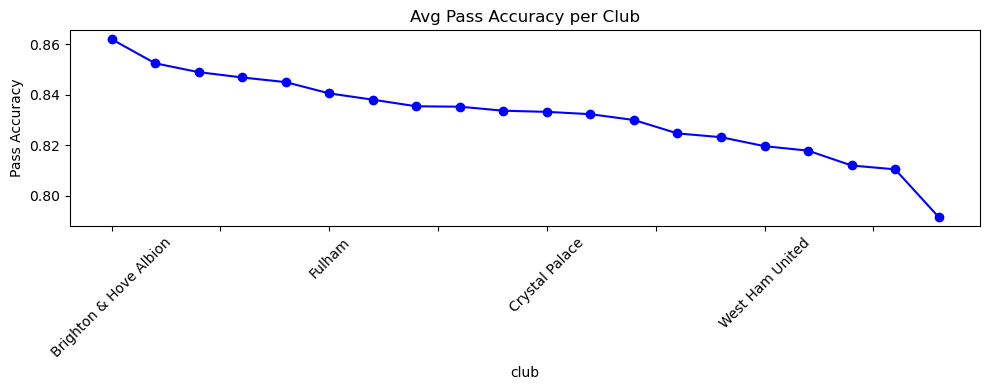

In [92]:
#Avereage Pass Accuracy By the club
df["pass_accuracy"] = (df["successful_passes"] / df["passes"]).replace([float("inf"), None], 0)
avg_pass_accuracy = df.groupby("club")["pass_accuracy"].mean().sort_values(ascending=False)
print(avg_pass_accuracy)

# Line plot
avg_pass_accuracy.plot(kind="line", marker='o', color='blue', figsize=(10, 4))
plt.title("Avg Pass Accuracy per Club")
plt.ylabel("Pass Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [98]:
# 1. Goal Contribution
df["goal_contribution"] = df["goals"] + df["assists"]
print("Top 5 Goal Contributions:")
print(df[["player_name", "goals", "assists", "goal_contribution"]]
      .sort_values(by="goal_contribution", ascending=False).head(5))

Top 5 Goal Contributions:
        player_name  goals  assists  goal_contribution
324   Mohamed Salah     29       18                 47
82     Bryan Mbeumo     20        7                 27
335  Erling Haaland     22        3                 25
46    Ollie Watkins     16        8                 24
417      Chris Wood     20        3                 23


In [100]:
# 2. Per 90-minute Stats (Safe division)
df["goals_per_90"] = np.where(df["minutes"] > 0, (df["goals"] / df["minutes"]) * 90, 0)
print("\nTop 5 Goals per 90 Minutes:")
print(df[["player_name", "goals", "minutes", "goals_per_90"]]
      .sort_values(by="goals_per_90", ascending=False).head(5))


Top 5 Goals per 90 Minutes:
         player_name  goals  minutes  goals_per_90
187   Matheus França      1       52      1.730769
36        Jhon Durán      7      626      1.006390
30     Donyell Malen      3      298      0.906040
57   Daniel Jebbison      1      105      0.857143
339     James McAtee      3      342      0.789474


In [102]:
df["assists_per_90"] = np.where(df["minutes"] > 0, (df["assists"] / df["minutes"]) * 90, 0)
print("\nTop 5 Assists per 90 Minutes:")
print(df[["player_name", "assists", "minutes", "assists_per_90"]]
      .sort_values(by="assists_per_90", ascending=False).head(5))


Top 5 Assists per 90 Minutes:
      player_name  assists  minutes  assists_per_90
190   Romain Esse        1      135        0.666667
508    Danny Ings        2      270        0.666667
498   Timo Werner        3      508        0.531496
114  Brajan Gruda        4      681        0.528634
1     Bukayo Saka       10     1735        0.518732


In [104]:
df["goal_contrib_per_90"] = np.where(df["minutes"] > 0, (df["goal_contribution"] / df["minutes"]) * 90, 0)
print("\nTop 5 Goal Contributions per 90 Minutes:")
print(df[["player_name", "goal_contribution", "minutes", "goal_contrib_per_90"]]
      .sort_values(by="goal_contrib_per_90", ascending=False).head(5))


Top 5 Goal Contributions per 90 Minutes:
        player_name  goal_contribution  minutes  goal_contrib_per_90
187  Matheus França                  1       52             1.730769
190     Romain Esse                  2      135             1.333333
324   Mohamed Salah                 47     3377             1.252591
36       Jhon Durán                  7      626             1.006390
508      Danny Ings                  3      270             1.000000


In [108]:
# 3. Accuracy Metrics
df["shot_accuracy"] = np.where(df["shots"] > 0, df["shots_on_target"] / df["shots"], 0)
print("\nTop 5 Shot Accuracy:")
print(df[["player_name", "shots", "shots_on_target", "shot_accuracy"]]
      .sort_values(by="shot_accuracy", ascending=False).head(5))


Top 5 Shot Accuracy:
           player_name  shots  shots_on_target  shot_accuracy
122         Igor Julio      1               18      18.000000
297       Oliver Skipp      5               40       8.000000
414        Álex Moreno      6               46       7.666667
515  Jean-Clair Todibo      5               33       6.600000
71       Marcos Senesi      3               16       5.333333


In [110]:
df["pass_accuracy"] = np.where(df["passes"] > 0, df["successful_passes"] / df["passes"], 0)
print("\nTop 5 Pass Accuracy:")
print(df[["player_name", "passes", "successful_passes", "pass_accuracy"]]
      .sort_values(by="pass_accuracy", ascending=False).head(5))


Top 5 Pass Accuracy:
         player_name  passes  successful_passes  pass_accuracy
192      Will Hughes    2547               2409       0.945819
149       Malo Gusto    1722               1620       0.940767
463     Ryan Manning    2309               2165       0.937635
477  Cristian Romero    1059                992       0.936733
427          Murillo     667                624       0.935532
